In [5]:
import json
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO
import skimage.io as io
import os


classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")


# confidence Threshold 설정
CONF_THR = 0.7

# test json 불러오기
test_json_path = "../dataset/test.json"

# test.json inference한 결과 경로 설정
submission_path = 'best_output.csv'

# 결과물이 저장될 root와 이름 설정
output_root = '../dataset'
output_json_name = 'pseudo_test'
output_path = os.path.join(output_root,output_json_name + '.json',)

# ---------------------------------------------------------------------------------------------------------------- #

with open(test_json_path) as f:
    test_json = json.load(f)

df = pd.read_csv(submission_path)
submission_list = df.values.tolist()

annotations = []

start_id = 0
start_anno_id = 0

print('pseudo labeling start...')

for bboxes, image_name in submission_list:
    # image
    bboxes_splited = bboxes.split()
    num_bbox = 0
    
    
    for i in range(6, len(bboxes_splited)+1, 6):
        bbox = bboxes_splited[i-6:i]
        _class, conf, left, top, right, bottom = bbox[0], float(bbox[1]), float(bbox[2]), float(bbox[3]), float(bbox[4]), float(bbox[5])
        width, height = right - left, bottom - top
        area = round(width * height, 2)
        
    
        if conf < CONF_THR:
            continue
        
        annotation = dict()
        annotation['image_id'] = start_id
        annotation['category_id'] = int(_class)
        annotation['area'] = area
        annotation['bbox'] = [round(left, 1), round(top, 1), round(width, 1), round(height, 1)]
        annotation['iscrowd'] = 0
        annotation['id'] = start_anno_id
        annotations.append(annotation)
        start_anno_id += 1
        
    start_id += 1



print('pseudo labeling finished...\n')
print(f'{len(annotations)}개의 annotations이 추가되었습니다.\n')

test_json['annotations'] += annotations

print(f'{output_path} 에 저장되었습니다.')

with open(output_path, 'w') as f:
    json.dump(test_json, f)

pseudo labeling start...
pseudo labeling finished...

13164개의 annotations이 추가되었습니다.

../dataset/pseudo_test.json 에 저장되었습니다.


test/3541.jpg
{'image_id': 3541, 'category_id': 2, 'area': 14367.99, 'bbox': [875.3, 441.6, 134.3, 107.0], 'iscrowd': 0, 'id': 9467}
{'image_id': 3541, 'category_id': 7, 'area': 429931.27, 'bbox': [71.6, 290.8, 915.9, 469.4], 'iscrowd': 0, 'id': 9468}
{'image_id': 3541, 'category_id': 7, 'area': 144569.95, 'bbox': [2.3, 719.0, 475.3, 304.1], 'iscrowd': 0, 'id': 9469}
{'image_id': 3541, 'category_id': 7, 'area': 243665.03, 'bbox': [230.5, 672.1, 700.6, 347.8], 'iscrowd': 0, 'id': 9470}
{'image_id': 3541, 'category_id': 7, 'area': 86560.23, 'bbox': [802.1, 377.8, 219.6, 394.2], 'iscrowd': 0, 'id': 9471}


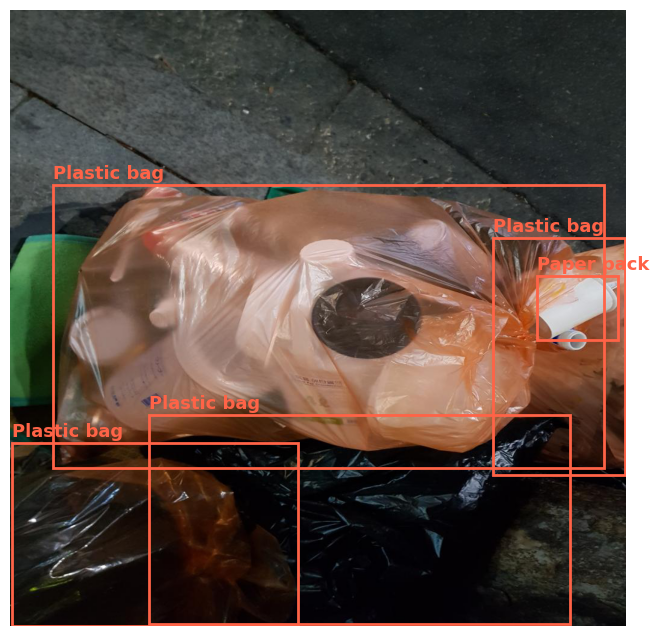

In [24]:
# Pseudo labeling Checking

with open(output_path) as f:
    pseudo_json = json.load(f)

index = random.randrange(len(pseudo_json['images']))

file_name, id = pseudo_json['images'][index]['file_name'], pseudo_json['images'][index]['id']
print(file_name)
I = io.imread(os.path.join('../dataset', file_name))
plt.rcParams["figure.figsize"] = (8,8)
plt.axis('off')
plt.imshow(I)
ax = plt.gca()
for annotation in annotations:
    if id == annotation['image_id']:
        print(annotation)
        box = annotation['bbox']
        bb = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth = 2, edgecolor = 'tomato',facecolor = 'none')
        ax.add_patch(bb)
        ax.text(box[0], box[1] - 10 , classes[int(annotation['category_id'])], weight = 'bold', color = 'tomato', fontsize = 13)
plt.show()